In [2]:
import pandas as pd

# Ruta del archivo .dta original
input_file_path = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP2/Bases/usu_individual_T104.dta'

# Leer el archivo .dta original
df_04 = pd.read_stata(input_file_path)

# Filtrar las filas donde 'REGION' es igual a 1
df_04_filtrado = df_04[df_04['region'] == "Gran Buenos Aires"].copy()

for col in df_04_filtrado.select_dtypes(include='category').columns:
    df_04_filtrado[col] = df_04_filtrado[col].cat.rename_categories(lambda x: str(x))

# Ruta para guardar el nuevo archivo .dta filtrado
output_file_path = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP2/Bases/usu_individual_T104_filtrado.dta'

# Guardar el DataFrame filtrado en un nuevo archivo .dta
df_04_filtrado.to_stata(output_file_path)

# Confirmar que se guardó correctamente
print(f"Archivo guardado en: {output_file_path}")

Archivo guardado en: C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP2/Bases/usu_individual_T104_filtrado.dta


In [3]:
# Ruta del archivo Excel
file_path_24 = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP2/Bases/usu_individual_T124.xlsx'

# Leer el archivo Excel
df_24 = pd.read_excel(file_path_24)

# Filtrar las filas donde 'REGION' es igual a 1
df_24_filtrado = df_24[df_24['REGION'] == 1]

# Guardar el DataFrame filtrado en un nuevo archivo Excel
output_path = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP2/Bases/usu_individual_T124_filtrado.xlsx'
df_24_filtrado.to_excel(output_path, index=False)
print(f"Archivo guardado en: {output_file_path}")

Archivo guardado en: C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP2/Bases/usu_individual_T104_filtrado.dta


In [4]:
import pandas as pd

# Rutas de los archivos
file_path_04 = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP2/Bases/usu_individual_T104_filtrado.dta'
file_path_24 = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP2/Bases/usu_individual_T124_filtrado.xlsx'

# Leer los archivos
df_04 = pd.read_stata(file_path_04)
df_24 = pd.read_excel(file_path_24, engine='openpyxl')

# 1. Normalizar los nombres de las columnas (convertir todo a mayúsculas y quitar espacios)
df_04.columns = df_04.columns.str.strip().str.upper()
df_24.columns = df_24.columns.str.strip().str.upper()

# 2. Filtrar solo las columnas comunes entre los dos DataFrames
columnas_comunes = list(set(df_04.columns) & set(df_24.columns))

# Filtramos ambas bases para que solo contengan las columnas comunes
df_04 = df_04[columnas_comunes].copy()
df_24 = df_24[columnas_comunes].copy()

# 3. Asegurarnos de que todas las columnas tengan el mismo tipo de datos
# Convertimos las columnas que sean numéricas o de tipo float a string si es necesario
for col in columnas_comunes:
    # Si la columna tiene un tipo de datos inconsistente (por ejemplo, mezclado entre string y float), la forzamos a string
    if df_04[col].dtype != df_24[col].dtype:
        try:
            # Convertimos ambas columnas a string (o nan donde sea necesario)
            df_04[col] = df_04[col].apply(lambda x: str(x) if pd.notnull(x) else None)
            df_24[col] = df_24[col].apply(lambda x: str(x) if pd.notnull(x) else None)
        except Exception as e:
            print(f"Error al convertir columna {col}: {e}")

# 4. Unir ambos DataFrames
df_unido = pd.concat([df_04, df_24], ignore_index=True)

# 6. Exportar el DataFrame unido a un archivo .dta (Stata)
output_path = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP2/Bases/usu_individual_T104_T124_unido.dta'
df_unido.to_stata(output_path, write_index=False)

print(f"Archivo final guardado en:\n{output_path}")

Archivo final guardado en:
C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP2/Bases/usu_individual_T104_T124_unido.dta


In [5]:
import numpy as np
import pandas as pd

# Evita el warning por downcasting
pd.set_option('future.no_silent_downcasting', True)

# Variables a trabajar
variables = ['PP11A', 'CH15', 'CAT_OCUP', 'CAT_INAC', 'V18_M',
             'V11_M', 'V19_AM', 'V5_M', 'V2_M', 'ESTADO',
             'NIVEL_ED', 'CH07', 'CH06', 'CH04', 'ANO4']

df_limpio = df_unido.copy()

# Valores a reemplazar por NaN
valores_invalidos = ['99', '999', '9999', '-1', '-9', '0', '0.0', 'Ns./Nr.',
                     'Entrevista individual no realizada (no respuesta al cuestion)', None]

# Paso 1: Reemplazo de valores inválidos *Clean
for col in variables:
    df_limpio[col] = df_limpio[col].replace(valores_invalidos, np.nan, regex=False)

# Paso 2: Conversión condicional a numérico (solo si los valores no nulos parecen ser todos dígitos)
for col in variables:
    muestra = df_limpio[col].dropna().astype(str)
    if not muestra.empty and muestra.apply(lambda x: x.replace('.', '', 1).isdigit()).all():
        df_limpio[col] = pd.to_numeric(df_limpio[col], errors='coerce')

# Paso 3: Filtro por año
df_limpio['ANO4'] = pd.to_numeric(df_limpio['ANO4'], errors='coerce')
df_2004 = df_limpio[df_limpio['ANO4'] == 2004]
df_2024 = df_limpio[df_limpio['ANO4'] == 2024]

# Paso 4: Conteo de nulos por variable y año
print("Valores nulos por variable:")
for var in variables:
    nulos_2004 = df_2004[var].isnull().sum()
    nulos_2024 = df_2024[var].isnull().sum()
    display(f"{var} - 2004: {nulos_2004} | 2024: {nulos_2024}")

Valores nulos por variable:


'PP11A - 2004: 7261 | 2024: 6812'

'CH15 - 2004: 3 | 2024: 0'

'CAT_OCUP - 2004: 4177 | 2024: 3588'

'CAT_INAC - 2004: 3617 | 2024: 3576'

'V18_M - 2004: 7642 | 2024: 7044'

'V11_M - 2004: 7634 | 2024: 6983'

'V19_AM - 2004: 7647 | 2024: 7051'

'V5_M - 2004: 7540 | 2024: 6788'

'V2_M - 2004: 6883 | 2024: 5886'

'ESTADO - 2004: 0 | 2024: 41'

'NIVEL_ED - 2004: 0 | 2024: 0'

'CH07 - 2004: 0 | 2024: 0'

'CH06 - 2004: 0 | 2024: 51'

'CH04 - 2004: 0 | 2024: 0'

'ANO4 - 2004: 0 | 2024: 0'

In [29]:
import pandas as pd

# Diccionarios de mapeo para todas las variables
mapa_estado = {
    'Entrevista individual no realizada (no respuesta al cuestion': 0,
    'Ocupado': 1,
    'Desocupado': 2,
    'Inactivo': 3,
    'Menor de 10 años': 4,
    'Ns./Nr.': 9
}

mapa_sexo = {
    'Varón': 1,
    'Mujer': 2
}

mapa_cobertura_medica = {
    'Obra social (incluye PAMI)': 1,
    'Mutual / Prepaga / Servicio de emergencia': 2,
    'Planes y seguros públicos': 3,
    'No paga ni le descuentan': 4,
    'Ns./Nr.': 9,
    'Obra social y mutual / prepaga / servicio de emergencia': 12,
    'Obra social y Planes y Seguros Públicos': 13,
    'Mutual / Prepaga / Servicio de emergencia / Planes y seguros públicos': 23,
    'Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros Públicos': 123
}

mapa_estado_civil = {
    'Unido': 1,
    'Casado': 2,
    'Separado o divorciado': 3,
    'Viudo': 4,
    'Soltero': 5
}

mapa_nivel_educativo = {
    'Primaria Incompleta (incluye educación especial)': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,
    'Sin Instrucción': 7,
    'Ns./Nr.': 9,
}

mapa_categoria_inactividad = {
    'Jubilado / Pensionado': 1,
    'Rentista': 2,
    'Estudiante': 3,
    'Ama de casa': 4,
    'Menor de 6 años': 5,
    'Discapacitado': 6,
    'Otros': 7
}

# Crear una copia de df_limpio en df_mapeado
df_mapeado = df_limpio.copy()

# Mapeo de cada columna y llenado de valores NaN
mapas = {
    'ESTADO': mapa_estado,
    'CH04': mapa_sexo,
    'CH08': mapa_cobertura_medica,
    'CH07': mapa_estado_civil,
    'NIVEL_ED': mapa_nivel_educativo,
    'CAT_INAC': mapa_categoria_inactividad
}

# Aplicamos el mapeo a cada columna
for columna, mapeo in mapas.items():
    if columna in df_mapeado.columns:
        # Limpiar la columna: convertir a string y eliminar espacios solo si no es nulo
        df_mapeado[columna] = df_mapeado[columna].apply(
            lambda x: str(x).strip() if pd.notnull(x) else x
        )

        # Aplicar el mapeo del diccionario
        df_mapeado[columna] = df_mapeado[columna].apply(
            lambda x: mapeo.get(x, x)
        )

        # Rellenar valores NaN con 0
        df_mapeado[columna] = df_mapeado[columna].fillna(0)

        # Convertir a float y luego a int
        df_mapeado[columna] = pd.to_numeric(df_mapeado[columna], errors='coerce').fillna(0).astype(int)

# Verificar los resultados después del mapeo
print("Conteo de valores por columna después del mapeo:")
for columna in mapas.keys():
    if columna in df_mapeado.columns:
        print(f"\nConteo de valores en '{columna}':")
        print(df_mapeado[columna].value_counts())

# Verificar cuántos valores únicos hay en cada columna
print("\nNúmero de respuestas únicas por columna:")
for columna in mapas.keys():
    if columna in df_mapeado.columns:
        print(f"\nNúmero de respuestas únicas en '{columna}': {df_mapeado[columna].nunique()}")

Conteo de valores por columna después del mapeo:

Conteo de valores en 'ESTADO':
ESTADO
1    6303
3    5462
4    2043
2     839
0      51
Name: count, dtype: int64

Conteo de valores en 'CH04':
CH04
2    7725
1    6973
Name: count, dtype: int64

Conteo de valores en 'CH08':
CH08
1     7876
4     5321
0      725
2      566
12     121
3       49
9       36
13       3
23       1
Name: count, dtype: int64

Conteo de valores en 'CH07':
CH07
5    7062
2    3879
1    2118
4     829
3     797
9      13
Name: count, dtype: int64

Conteo de valores en 'NIVEL_ED':
NIVEL_ED
3    2790
4    2696
2    2374
1    2273
6    1755
5    1583
0     805
7     422
Name: count, dtype: int64

Conteo de valores en 'CAT_INAC':
CAT_INAC
0    7861
3    3034
4    1469
5    1165
1     717
7     320
6     100
2      32
Name: count, dtype: int64

Número de respuestas únicas por columna:

Número de respuestas únicas en 'ESTADO': 5

Número de respuestas únicas en 'CH04': 2

Número de respuestas únicas en 'CH08': 9

Númer

In [7]:
#Conteo de nulos por variable y año
nulos_data = []

# Contar nulos para cada variable por año (2004 y 2024)
for var in variables:
    nulos_2004 = df_limpio[df_limpio['ANO4'] == 2004][var].isnull().sum()
    nulos_2024 = df_limpio[df_limpio['ANO4'] == 2024][var].isnull().sum()

    # Agregar los datos a la lista con el identificador de año
    nulos_data.append([var, '2004', nulos_2004])
    nulos_data.append([var, '2024', nulos_2024])

# Crear DataFrame con los resultados
df_nulos = pd.DataFrame(nulos_data, columns=['Variable', 'Año', 'Total_Nulos'])

# Ordenar por total de nulos de manera descendente
df_nulos_sorted = df_nulos.sort_values(by='Total_Nulos', ascending=False)

# Imprimir la tabla ordenada
display(df_nulos_sorted.head(5))

,Variable,Año,Total_Nulos
12,V19_AM,2004,7647
8,V18_M,2004,7642
10,V11_M,2004,7634
14,V5_M,2004,7540
0,PP11A,2004,7261


In [8]:
# Variables a revisar
variables = ['PP11A', 'CH15', 'CAT_OCUP', 'CAT_INAC', 'V18_M',
             'V11_M', 'V19_AM', 'V5_M', 'V2_M', 'ESTADO',
             'NIVEL_ED', 'CH07', 'CH06', 'CH04', 'ANO4']

# Obtener y mostrar solo los valores negativos para cada variable
for col in variables:
    # Convertir la columna a numérico
    df_unido[col] = pd.to_numeric(df_unido[col], errors='coerce')
    
    # Filtrar los valores negativos
    negativos = df_unido[col][df_unido[col] < 0].unique()
    
    # Mostrar solo las columnas que tienen valores negativos
    if len(negativos) > 0:
        print(f"Valores negativos en la columna {col}:")
        print(negativos)
        print("\n")
# En este paso mostramos que variables tienen valores negativos. Esos valores los habiamos limpiado antes en *Clean.

Valores negativos en la columna V18_M:
[-9.]


Valores negativos en la columna V11_M:
[-9.]


Valores negativos en la columna V5_M:
[-9.]


Valores negativos en la columna V2_M:
[-9.]


Valores negativos en la columna CH06:
[-1.]




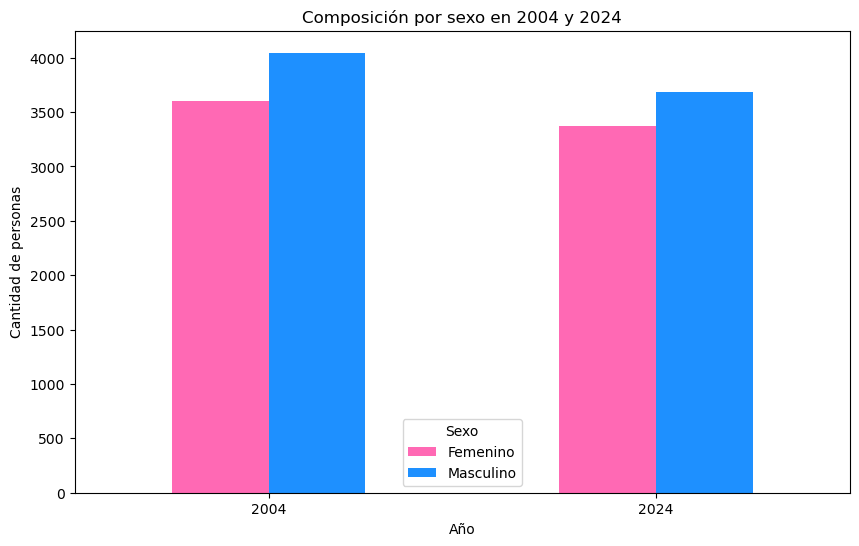

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Reemplazar los valores de 'Varón' y 'Mujer' con 1 y 2 respectivamente
df_limpio['CH04'] = df_limpio['CH04'].replace({'Varón': 1, 'Mujer': 2, '1': 1, '2': 2})

# Convertir 'ANO4' a tipo int para eliminar el '.0'
df_limpio['ANO4'] = df_limpio['ANO4'].astype(int)

# Filtramos los datos para los años 2004 y 2024
df_filtrado = df_limpio[df_limpio['ANO4'].isin([2004, 2024])]

# Contamos las ocurrencias por sexo y año
sexo_por_ano = df_filtrado.groupby(['ANO4', 'CH04']).size().unstack().fillna(0)

# Colores personalizados
colores = ['#FF69B4', '#1E90FF']  # Rosa para Femenino, Azul para Masculino

# Graficamos el gráfico de barras
ax = sexo_por_ano.plot(kind='bar', stacked=False, figsize=(10, 6), color=colores)

# Añadimos títulos y etiquetas
plt.title('Composición por sexo en 2004 y 2024')
plt.xlabel('Año')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)

# Personalizamos los ticks del eje Y para eliminar el ".0"
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x)}'))

# Añadimos la leyenda y etiquetas personalizadas
plt.legend(title='Sexo', labels=['Femenino', 'Masculino'])

# Mostramos el gráfico
plt.show()

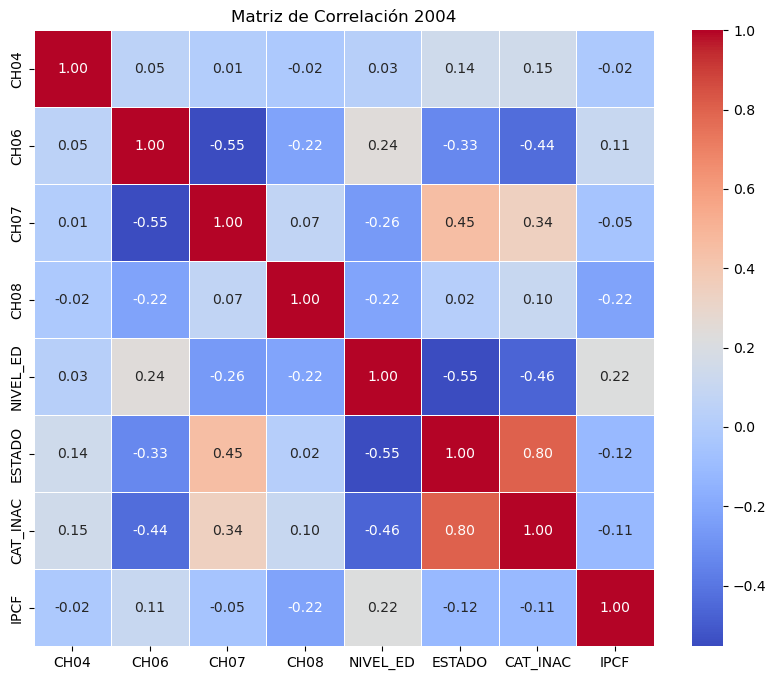

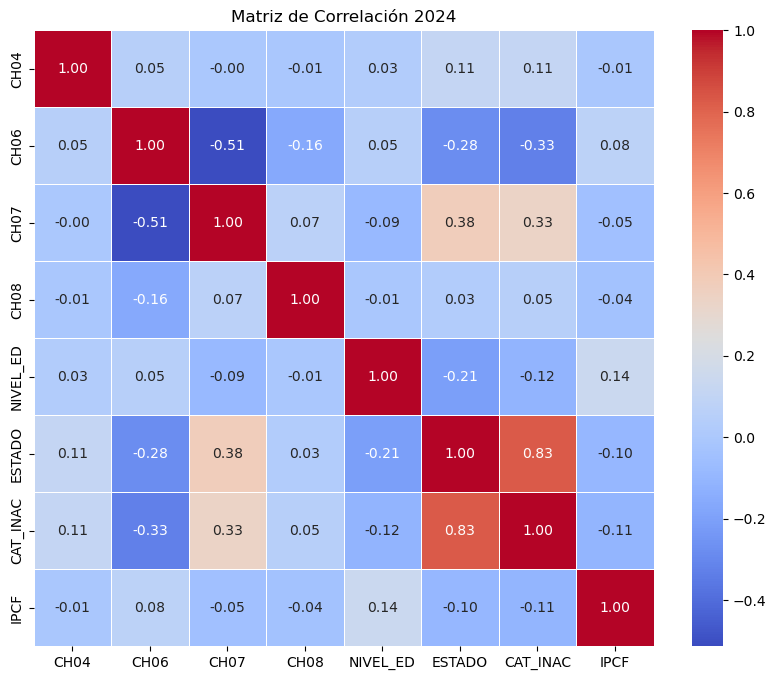

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las columnas que vamos a usar para la matriz de correlación
columnas = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']

# Asumimos que df_mapeado es tu DataFrame mapeado, y que tiene los datos de 2004 y 2024

# Seleccionamos solo las columnas relevantes de df_mapeado para ambos años
df_2004_relevante = df_mapeado[df_mapeado['ANO4'] == 2004][columnas]
df_2024_relevante = df_mapeado[df_mapeado['ANO4'] == 2024][columnas]

# Asegurarnos de que los datos estén en formato numérico para calcular la correlación
df_2004_relevante = df_2004_relevante.apply(pd.to_numeric, errors='coerce')
df_2024_relevante = df_2024_relevante.apply(pd.to_numeric, errors='coerce')

# Calcular la matriz de correlación para 2004
corr_2004 = df_2004_relevante.corr()

# Calcular la matriz de correlación para 2024
corr_2024 = df_2024_relevante.corr()

# Visualizar la matriz de correlación para 2004
plt.figure(figsize=(10, 8))
sns.heatmap(corr_2004, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación 2004')
plt.show()

# Visualizar la matriz de correlación para 2024
plt.figure(figsize=(10, 8))
sns.heatmap(corr_2024, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación 2024')
plt.show()

In [8]:
# Reemplazamos texto por los códigos correspondientes
df_limpio['ESTADO'] = df_limpio['ESTADO'].replace({
    'Ocupado': 1,
    'Desocupado': 2,
    'Inactivo': 3,
    'Menor de 10 años': 4,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4
})

# Asegurarse de que Estado sea numérica
df_limpio['ESTADO'] = pd.to_numeric(df_limpio['ESTADO'], errors='coerce')

# Agrupar por año (ANO4) y estado (ESTADO), luego contar las ocurrencias
conteo_estado_por_ano = df_limpio.groupby(['ANO4', 'ESTADO']).size().unstack(fill_value=0)

# Extraer los datos de desocupados (2) e inactivos (3) y asegurarnos de que las columnas se alineen
desocupados_por_ano = conteo_estado_por_ano[2]  # Desocupados (2)
inactivos_por_ano = conteo_estado_por_ano[3]  # Inactivos (3)

# Crear un nuevo DataFrame con los datos de desocupados e inactivos por año
df_estado_por_ano = pd.DataFrame({
    'Desocupados': desocupados_por_ano,
    'Inactivos': inactivos_por_ano
})

# Convertir los años a enteros para eliminar los decimales
df_estado_por_ano.index = df_estado_por_ano.index.astype(int)

# Mostrar el DataFrame usando display
from IPython.display import display
display(df_estado_por_ano)

,Desocupados,Inactivos
ANO4,,
2004,528,2800
2024,311,2662


In [28]:
# Mapear los valores de ESTADO
df_mapeado['ESTADO'] = df_mapeado['ESTADO'].map(mapa_estado)

# Mostrar los valores únicos después del mapeo para verificar
print("Valores únicos de ESTADO después del mapeo:")
print(df_mapeado['ESTADO'].unique())

# Filtrar los estados que nos interesan
df_estado = df_mapeado[df_mapeado['ESTADO'].isin([1, 2, 3])]

# Verificamos cuántas filas quedaron
print(f"Número de filas con ESTADO 1, 2 o 3: {len(df_estado)}")

# Revisar si hay datos nulos en IPCF o ANO4
print("Valores nulos en columnas clave:")
print(df_estado[['ANO4', 'ESTADO', 'IPCF']].isnull().sum())

# Agrupar y calcular la media
media_ipcf_por_ano_estado = df_estado.groupby(['ANO4', 'ESTADO'])['IPCF'].mean().astype(int)

# Convertir los años a enteros (solo si es necesario)
media_ipcf_por_ano_estado.index = media_ipcf_por_ano_estado.index.set_levels(
    media_ipcf_por_ano_estado.index.levels[0].astype(int), level=0)

# Agregar símbolo de dólar
media_ipcf_por_ano_estado_formateado = media_ipcf_por_ano_estado.apply(lambda x: f'${x:,}')

# Pasar a DataFrame para mostrarlo mejor
media_ipcf_por_ano_estado_df = media_ipcf_por_ano_estado_formateado.reset_index(name='Media IPCF')

# Mostrar resultado
print("Media de ingreso per cápita familiar, según estado")
display(media_ipcf_por_ano_estado_df.style.hide(axis="index"))

Valores únicos de ESTADO después del mapeo:
[nan]
Número de filas con ESTADO 1, 2 o 3: 0
Valores nulos en columnas clave:
ANO4      0
ESTADO    0
IPCF      0
dtype: int64
Media de ingreso per cápita familiar, según estado


ANO4,ESTADO,Media IPCF


In [35]:
# Filtrar solo los estados de interés
df_estado = df_mapeado[df_mapeado['ESTADO'].isin([1, 2, 3])]

# Calcular la media
media_ipcf_por_ano_estado_df = (
    df_estado
    .groupby(['ANO4', 'ESTADO'])['IPCF']
    .mean()
    .reset_index()
    .astype({'ANO4': int, 'ESTADO': int, 'IPCF': int})
)

# Agregar símbolo de dólar
media_ipcf_por_ano_estado_df['IPCF'] = media_ipcf_por_ano_estado_df['IPCF'].apply(lambda x: f"${x:,}")

# Crear un diccionario inverso para reemplazar los números por nombres
estado_labels = {1: 'Ocupado', 2: 'Desocupado', 3: 'Inactivo'}

# Reemplazar los números por nombres
media_ipcf_por_ano_estado_df['ESTADO'] = media_ipcf_por_ano_estado_df['ESTADO'].map(estado_labels)

# Mostrar sin índice
display(media_ipcf_por_ano_estado_df.style.hide(axis="index"))

ANO4,ESTADO,IPCF
2004,Ocupado,$476
2004,Desocupado,$224
2004,Inactivo,$315
2024,Ocupado,"$207,644"
2024,Desocupado,"$85,019"
2024,Inactivo,"$130,704"


In [21]:
# Crear base con los que sÃ­ respondieron (ESTADO distinto de 0 y no nulo)
respondieron = df_mapeado[(df_mapeado['ESTADO'] != 0) & (df_mapeado['ESTADO'].notna())].copy()

# Crear base con los que no respondieron (ESTADO igual a 0 o nulo)
norespondieron = df_mapeado[(df_mapeado['ESTADO'] == 0) | (df_mapeado['ESTADO'].isna())].copy()

# Guardar las bases en archivos Excel
respondieron.to_excel("C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP2/Bases/respondieron.xlsx", index=False)
norespondieron.to_excel("C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP2/Bases/norespondieron.xlsx", index=False)

# Confirmar cantidad de registros
print(f"Respondieron: {len(respondieron)} personas")
print(f"No respondieron: {len(norespondieron)} personas")

Respondieron: 14647 personas
No respondieron: 51 personas


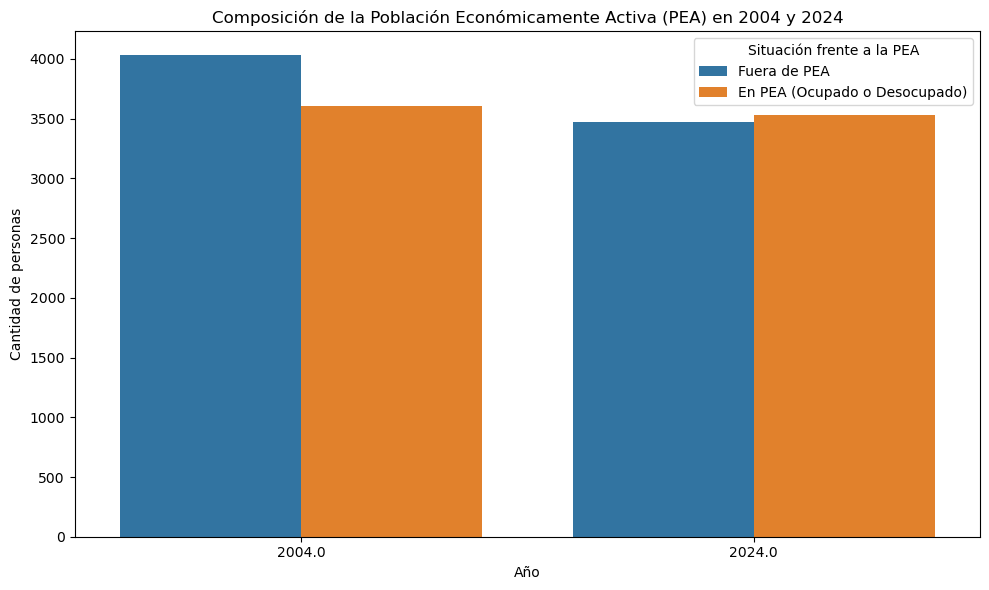

In [36]:
# Agregar la columna PEA: 1 si ESTADO es 1 u 2 (ocupado o desocupado), 0 en caso contrario
respondieron['PEA'] = respondieron['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por año y PEA, contar valores
pea_agg = respondieron.groupby(['ANO4', 'PEA']).size().reset_index(name='Cantidad')

# Reemplazar valores PEA por etiquetas para mejor visualización
pea_agg['PEA'] = pea_agg['PEA'].map({1: 'En PEA (Ocupado o Desocupado)', 0: 'Fuera de PEA'})

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=pea_agg, x='ANO4', y='Cantidad', hue='PEA')
plt.title('Composición de la Población Económicamente Activa (PEA) en 2004 y 2024')
plt.xlabel('Año')
plt.ylabel('Cantidad de personas')
plt.legend(title='Situación frente a la PEA')
plt.tight_layout()
plt.show()

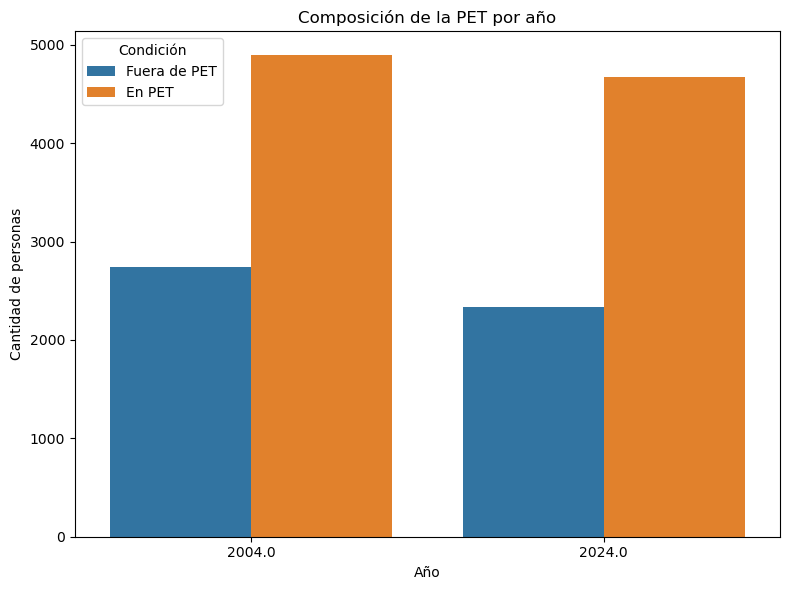

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarnos de que la columna 'CH06' esté en formato numérico (edad)
respondieron['CH06'] = pd.to_numeric(respondieron['CH06'], errors='coerce')

# Crear columna PET: entre 15 y 65 años inclusive
respondieron['PET'] = respondieron['CH06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

# Crear gráfico de barras para la PET por año
pet_plot = respondieron.groupby(['ANO4', 'PET']).size().reset_index(name='Cantidad')

# Mapear valores para que sea más claro en el gráfico
pet_plot['PET'] = pet_plot['PET'].map({0: 'Fuera de PET', 1: 'En PET'})

# Crear el gráfico
plt.figure(figsize=(8, 6))
sns.barplot(data=pet_plot, x='ANO4', y='Cantidad', hue='PET')

# Ajustes del gráfico
plt.title('Composición de la PET por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de personas')
plt.legend(title='Condición')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

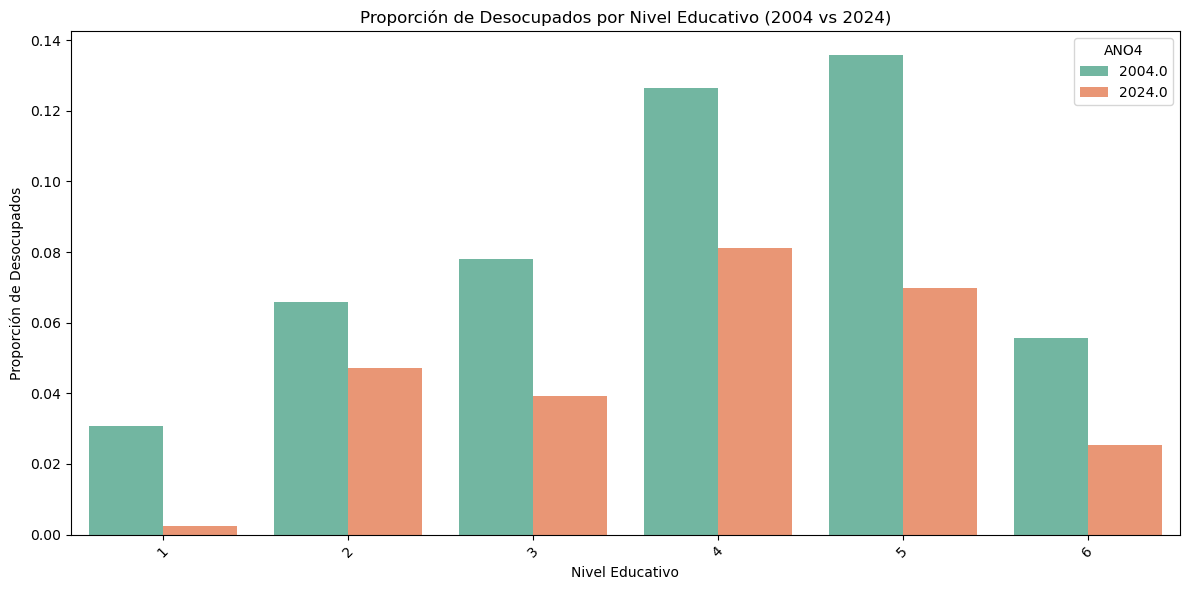

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarse de que ANO4 sea string
respondieron['ANO4'] = respondieron['ANO4'].astype(str)

# Filtrar solo las personas desocupadas
desocupados = respondieron[respondieron['ESTADO'] == 2]

# Agrupar por año y nivel educativo, y contar cuántos desocupados hay por grupo
conteo_desocupados = desocupados.groupby(['ANO4', 'NIVEL_ED']).size().reset_index(name='cantidad_desocupados')

# Obtener el total de personas por año y nivel educativo (para calcular proporciones)
total_por_educacion = respondieron.groupby(['ANO4', 'NIVEL_ED']).size().reset_index(name='total_personas')

# Unir ambos DataFrames para tener total y desocupados por grupo
proporciones = pd.merge(conteo_desocupados, total_por_educacion, on=['ANO4', 'NIVEL_ED'])

# ❗️Filtrar para excluir NIVEL_ED == 0
proporciones = proporciones[proporciones['NIVEL_ED'] != 0]

# Calcular la proporción
proporciones['proporcion_desocupados'] = proporciones['cantidad_desocupados'] / proporciones['total_personas']

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=proporciones, x='NIVEL_ED', y='proporcion_desocupados', hue='ANO4', palette='Set2')

plt.title('Proporción de Desocupados por Nivel Educativo (2004 vs 2024)')
plt.xlabel('Nivel Educativo')
plt.ylabel('Proporción de Desocupados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

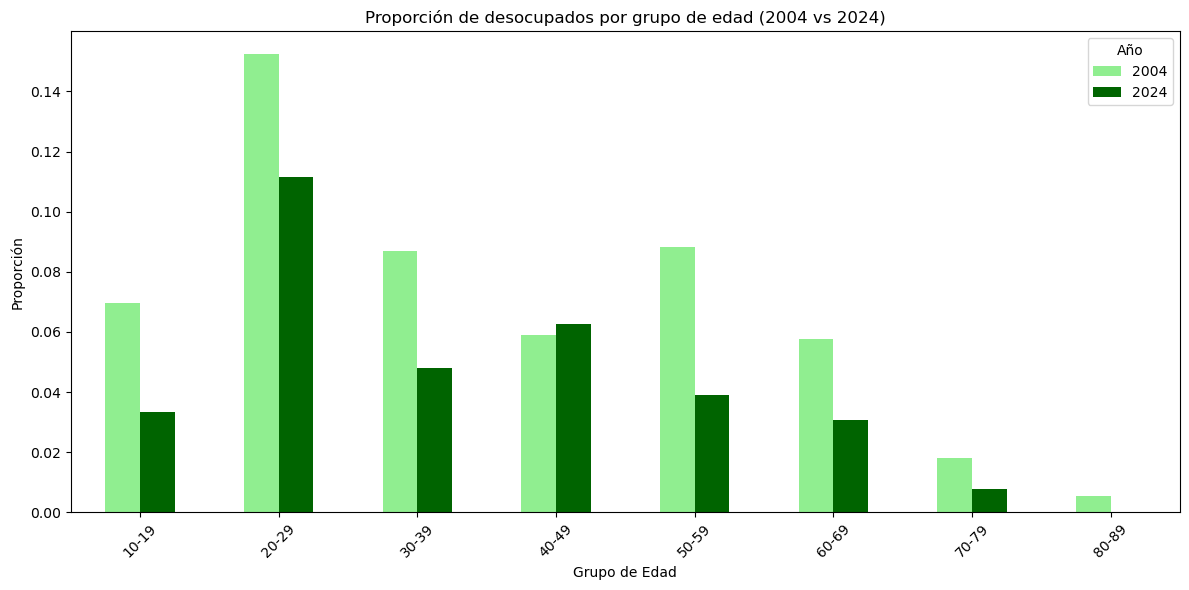

In [69]:
import matplotlib.pyplot as plt

# Convertir CH06 a numérico
df_mapeado['CH06'] = pd.to_numeric(df_mapeado['CH06'], errors='coerce')

# Filtrar datos de 2004 y 2024
df_comp = df_mapeado[df_mapeado['ANO4'].isin([2004, 2024])].copy()

# Crear grupo etario en intervalos de 10 años
bins = list(range(0, 101, 10))  # 0-9, 10-19, ..., 90-99
labels = [f'{i}-{i+9}' for i in bins[:-1]]
df_comp['GRUPO_EDAD'] = pd.cut(df_comp['CH06'], bins=bins, labels=labels, right=False)

# Calcular totales y desocupados
total_por_edad = df_comp.groupby(['ANO4', 'GRUPO_EDAD'], observed=False).size().reset_index(name='total')
desocupados_por_edad = df_comp[df_comp['ESTADO'] == 2].groupby(['ANO4', 'GRUPO_EDAD'], observed=False).size().reset_index(name='desocupados')

# Unir y calcular proporción
df_edad = pd.merge(total_por_edad, desocupados_por_edad, on=['ANO4', 'GRUPO_EDAD'], how='left')
df_edad['desocupados'] = df_edad['desocupados'].fillna(0)
df_edad['proporcion'] = df_edad['desocupados'] / df_edad['total']

# Filtrar los grupos de edad sin datos (0-9 y 90-99)
df_edad_filtrado = df_edad[~df_edad['GRUPO_EDAD'].isin(['0-9', '90-99'])]

# Pivotear para graficar
pivot_edad = df_edad_filtrado.pivot(index='GRUPO_EDAD', columns='ANO4', values='proporcion')

# Reordenar columnas por si acaso
pivot_edad = pivot_edad[[2004, 2024]]

# Graficar con colores personalizados
pivot_edad.plot(kind='bar', figsize=(12, 6), color=['#90EE90', '#006400'])  # Verde claro y verde oscuro
plt.title('Proporción de desocupados por grupo de edad (2004 vs 2024)')
plt.ylabel('Proporción')
plt.xlabel('Grupo de Edad')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.grid(axis='y', linestyle='--', alpha=0.0)  # Eliminar las líneas de la grilla
plt.tight_layout()
plt.show()

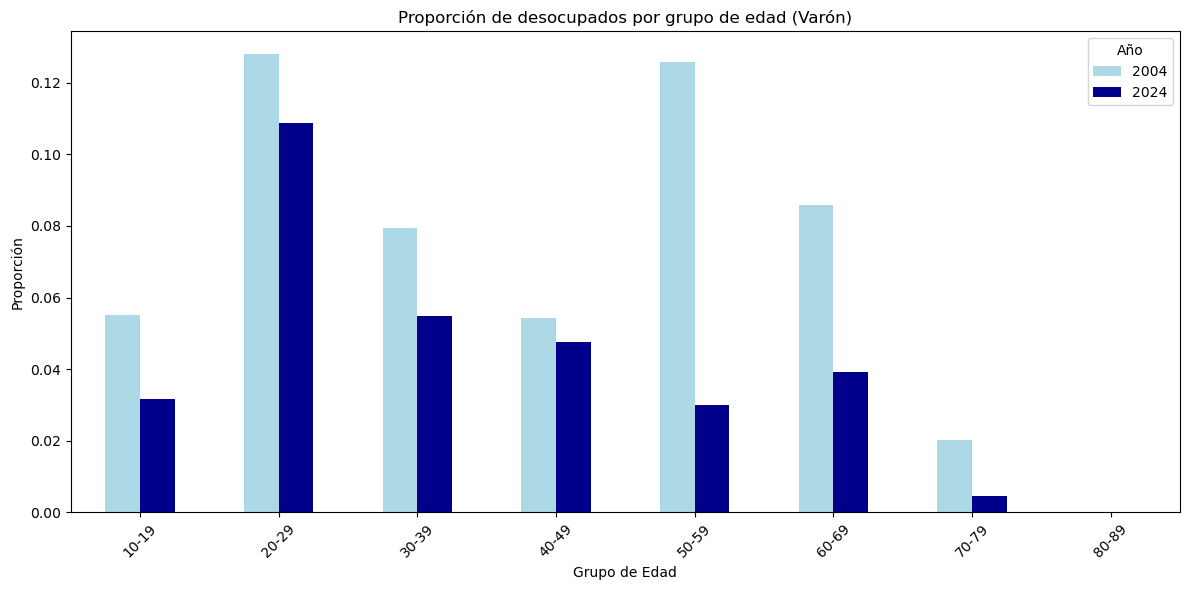

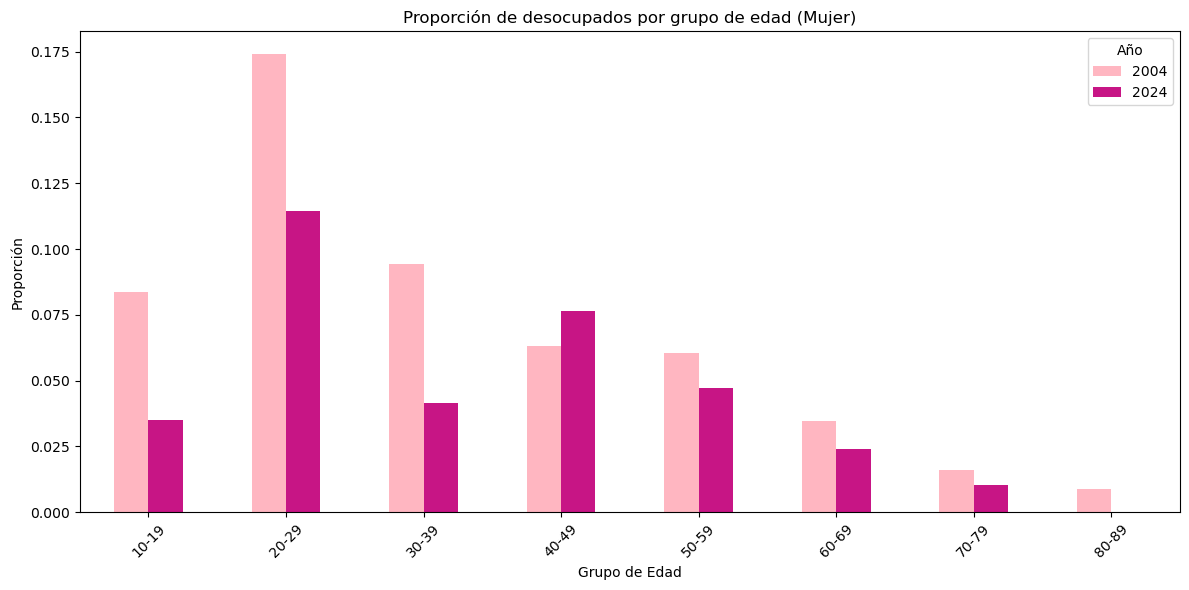

In [67]:
import matplotlib.pyplot as plt

# Convertir CH06 a numérico
df_mapeado['CH06'] = pd.to_numeric(df_mapeado['CH06'], errors='coerce')

# Crear columna SEXO basada en CH04 ya mapeada
df_mapeado['SEXO'] = df_mapeado['CH04']

# Filtrar datos de 2004 y 2024
df_comp = df_mapeado[df_mapeado['ANO4'].isin([2004, 2024])].copy()

# Crear grupo etario en intervalos de 10 años
bins = list(range(0, 101, 10))  # 0-9, 10-19, ..., 90-99
labels = [f'{i}-{i+9}' for i in bins[:-1]]
df_comp['GRUPO_EDAD'] = pd.cut(df_comp['CH06'], bins=bins, labels=labels, right=False)

# Función para graficar por sexo con colores personalizados
def graficar_por_sexo(sexo_codigo, sexo_nombre, colores):
    df_sexo = df_comp[df_comp['SEXO'] == sexo_codigo]

    total = df_sexo.groupby(['ANO4', 'GRUPO_EDAD'], observed=False).size().reset_index(name='total')
    desocupados = df_sexo[df_sexo['ESTADO'] == 2].groupby(['ANO4', 'GRUPO_EDAD'], observed=False).size().reset_index(name='desocupados')

    df_edad = pd.merge(total, desocupados, on=['ANO4', 'GRUPO_EDAD'], how='left')
    df_edad['desocupados'] = df_edad['desocupados'].fillna(0)
    df_edad['proporcion'] = df_edad['desocupados'] / df_edad['total']

    # Filtrar edades sin datos
    df_edad = df_edad[~df_edad['GRUPO_EDAD'].isin(['0-9', '90-99'])]

    pivot = df_edad.pivot(index='GRUPO_EDAD', columns='ANO4', values='proporcion')

    # Reordenar columnas por año
    pivot = pivot[[2004, 2024]]

    # Graficar con colores personalizados
    pivot.plot(kind='bar', figsize=(12, 6), color=[colores[2004], colores[2024]])
    plt.title(f'Proporción de desocupados por grupo de edad ({sexo_nombre})')
    plt.ylabel('Proporción')
    plt.xlabel('Grupo de Edad')
    plt.xticks(rotation=45)
    plt.legend(title='Año')
    plt.grid(axis='y', linestyle='--', alpha=0.0)
    plt.tight_layout()
    plt.show()

# Colores por sexo
colores_varon = {2004: '#ADD8E6', 2024: '#00008B'}     # Azul claro y azul oscuro
colores_mujer = {2004: '#FFB6C1', 2024: '#C71585'}     # Rosa claro y rosa oscuro

# Graficar para varón y mujer
graficar_por_sexo(1, 'Varón', colores_varon)
graficar_por_sexo(2, 'Mujer', colores_mujer)